# Load an ASPIICS map

The ASPIICS map is not completely part of  Sunpy yet: it needs a special import. 
First download the source code from the ROB repository (https://gitlab-as.oma.be/P3SC/aspiicsmap):
>git clone https://gitlab-as.oma.be/P3SC/aspiicsmap.git --depth 1
>
>cd aspiicsmap
>
>pip3 install . 


Import sunpy **and** ASPIICSMap (but after that, you can simply work with the Sunpy map that will have automatically extended to handling ASPIICS data):

In [14]:
import sunpy.map
from aspiicsmap import ASPIICSMap 

Set the path where you have stored the test data.

In [1]:
dataloc = "./tutorial_data/"


## Load a Sunpy map with an ASPIICS level-2 (calibrated) Wideband image.

In [16]:
aspiicsmap_wb_l2 = sunpy.map.Map(f"{dataloc}aspiics_wb_l2_1320404D000212_20250812T181424.fits")

Show the map

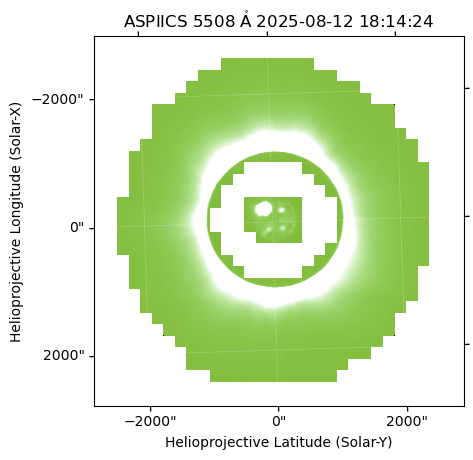

In [17]:
import matplotlib.pyplot as plt
aspiicsmap_wb_l2.plot()
plt.show()

Because this is Level-2 (only 1 single exposure before the merging of exposures (HDR) is applied; 1 s exposure time), in the figure above, some tiles are missing and some pixels are saturated. And the image is not clipped, not radially filtered, etc. 

Also, the image is neither centered nor rotated (Solar North is roughly on the left side, and you can notice that latitude is on abscissa). 
Let's correct the centering and rotation for the purpose of display: 

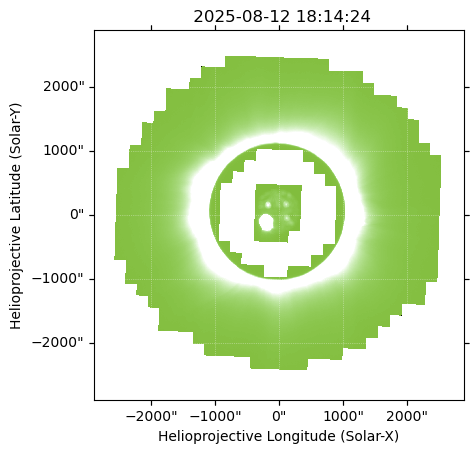

In [19]:
import numpy as np
from copy import deepcopy

swcs=deepcopy(aspiicsmap_wb_l2.wcs)
swcs.wcs.crval=np.array([0,0])   # the destination map/image will be centered on longitude and Latitude 0
swcs.wcs.pc=np.array([[1,0],[0,1]])   # the destination map/image will have no need of further rotation
reprojected_map=aspiicsmap_wb_l1.reproject_to(swcs)

plt.close()

reprojected_map.plot()
plt.show()

## Loading a level-3 image
(Reminder: the code to produce your Level-2 and/or Level-3 data locally and personalise the processing: coming soon!)

"bt" in the filename means B_t, total brightness (white light). 

Let's explore more functionalities:

- normalisation
- colormap

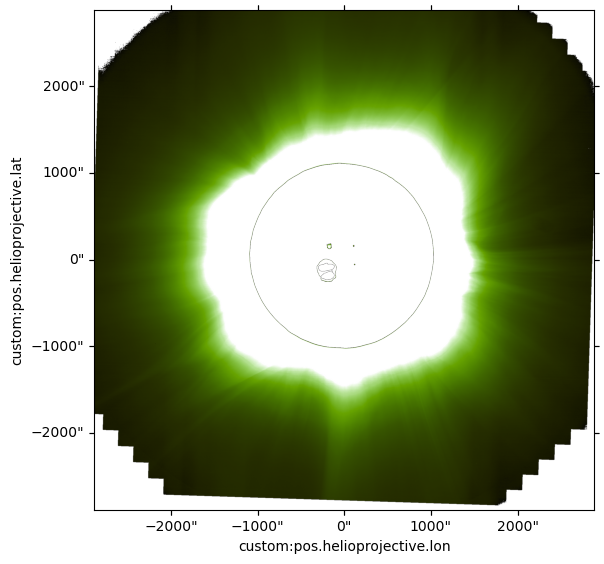

In [22]:
plt.close()

# Change the normalization and the colormap
aspiicsmap_bt_l3 = sunpy.map.Map(f"{dataloc}aspiics_bt_l3_1320404D0002_20250812T181424.fits")
fig = plt.figure(figsize=(5, 5))
ax = plt.axes([0, 0, 1, 1], projection=aspiicsmap_bt_l3)

# get the colormap and normalization from the map plot settings
norm = aspiicsmap_bt_l3.plot_settings['norm']
cmap = aspiicsmap_bt_l3.plot_settings['cmap']

# display the data
ax.imshow(aspiicsmap_bt_l3.data, cmap, norm=norm, origin='lower')

- Better clipping

The value of vmin is 1e-10
The value of vmax is 1e-06


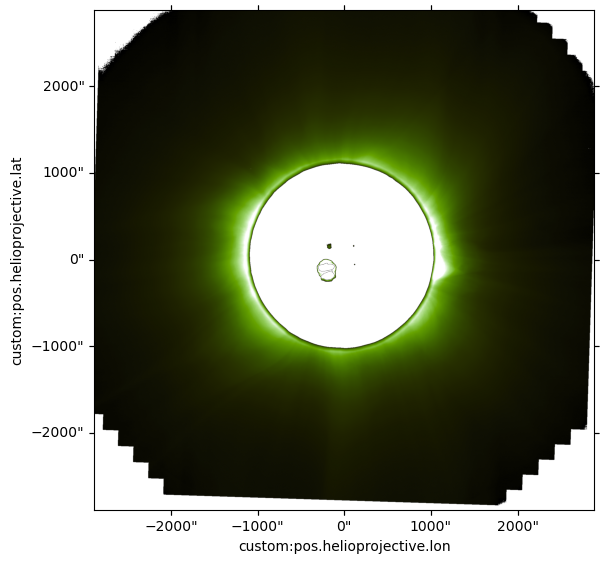

In [23]:
plt.close()

# Change the normalization and the colormap
aspiicsmap_bt_l3 = sunpy.map.Map(f"{dataloc}aspiics_bt_l3_1320404D0002_20250812T181424.fits",
                                 vmin=1e-10, vmax=1e-6)   # unit = Mean Solar Brightness
fig = plt.figure(figsize=(5, 5))
ax = plt.axes([0, 0, 1, 1], projection=aspiicsmap_bt_l3)

# get the colormap and normalization from the map plot settings
norm = aspiicsmap_bt_l3.plot_settings['norm']
cmap = aspiicsmap_bt_l3.plot_settings['cmap']

# display the data
ax.imshow(aspiicsmap_bt_l3.data, cmap, norm=norm, origin='lower')

- Replace "bad" pixels (NaN and Inf) with black pixels

The value of vmin is 1e-10
The value of vmax is 1e-06


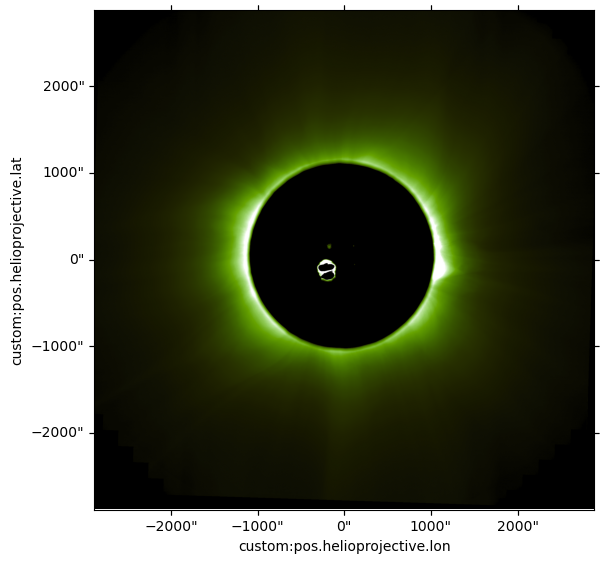

In [24]:
plt.close()

# Change the normalization and the colormap
aspiicsmap_bt_l3 = sunpy.map.Map(f"{dataloc}aspiics_bt_l3_1320404D0002_20250812T181424.fits",
                                 vmin=1e-10, vmax=1e-6)
fig = plt.figure(figsize=(5, 5))
ax = plt.axes([0, 0, 1, 1], projection=aspiicsmap_bt_l3)

# get the colormap and normalization from the map plot settings
norm = aspiicsmap_bt_l3.plot_settings['norm']
cmap = aspiicsmap_bt_l3.plot_settings['cmap']
#-- set bad pixels to black --
cmap.set_bad([0., 0., 0., 1.])

# display the data
ax.imshow(aspiicsmap_bt_l3.data, cmap, norm=norm, origin='lower')

An example of level-3 polarized brightness image (automatically applying a different colormap)

The value of vmin is 1e-10
The value of vmax is 1e-06


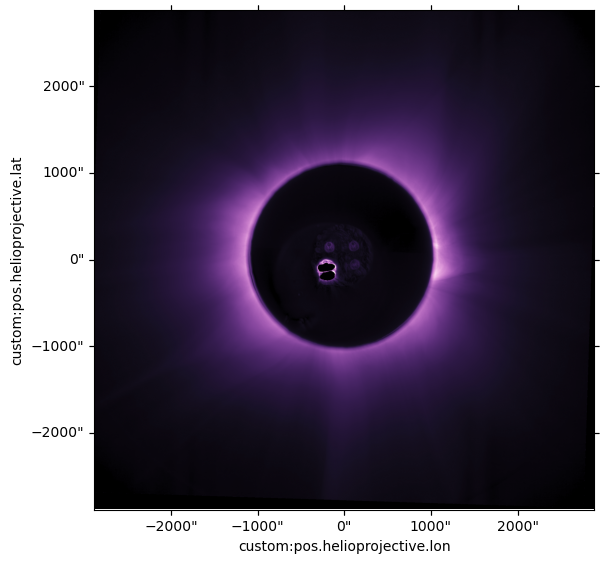

In [25]:
plt.close()

# Change the normalization and the colormap
aspiicsmap_pb_l3 = sunpy.map.Map(f"{dataloc}aspiics_pb_l3_1320607D0001_20250812T201607.fits",
                                 vmin=1e-10, vmax=1e-6)
fig = plt.figure(figsize=(5, 5))
ax = plt.axes([0, 0, 1, 1], projection=aspiicsmap_pb_l3)

# get the colormap and normalization from the map plot settings
norm = aspiicsmap_pb_l3.plot_settings['norm']
cmap = aspiicsmap_pb_l3.plot_settings['cmap']

#-- set bad pixels to black --
cmap.set_bad([0., 0., 0., 1.])

# display the data
ax.imshow(aspiicsmap_pb_l3.data, cmap, norm=norm, origin='lower')